# Import Packages

In [1]:
# Autoreload
%load_ext autoreload
%autoreload 

# Libraries
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data Ingestion

In [2]:
# Raw Data
RAW_DATA_FILEPATH = '../data/raw/raw-insurance.csv'

df_insurance = pd.read_csv(RAW_DATA_FILEPATH)
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# Statistical values for numerical colunns

df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Cleansing

In [5]:
# Statistical values for categorical colunns

df_insurance.describe(exclude=np.number)

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [6]:
# Check missing values

def missing_values_summary(df):
    missing_counts = df.isnull().sum()
    total_count = df.shape[0]  # Total number of rows in the DataFrame

    missing_df = pd.DataFrame({'Column': missing_counts.index, 'Missing Count': missing_counts.values})
    missing_df['Missing Percentage'] = (missing_df['Missing Count'] / total_count) * 100

    return missing_df

missing_values_summary(df_insurance)

,Column,Missing Count,Missing Percentage
0,age,0,0.0
1,sex,0,0.0
2,bmi,0,0.0
3,children,0,0.0
4,smoker,0,0.0
5,region,0,0.0
6,charges,0,0.0


In [7]:
# Drop duplicated columns

print(f"Number of duplicated rows before = {df_insurance.duplicated().sum()}")

df_insurance = df_insurance.drop_duplicates()

print(f"Number of duplicated rows after = {df_insurance.duplicated().sum()}")

Number of duplicated rows before = 1
Number of duplicated rows after = 0


# Exploratory Data Analysis

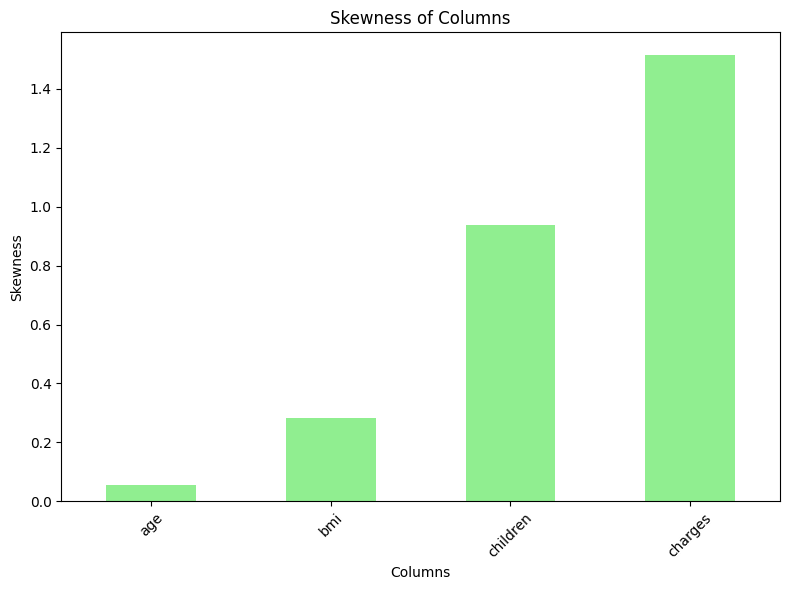

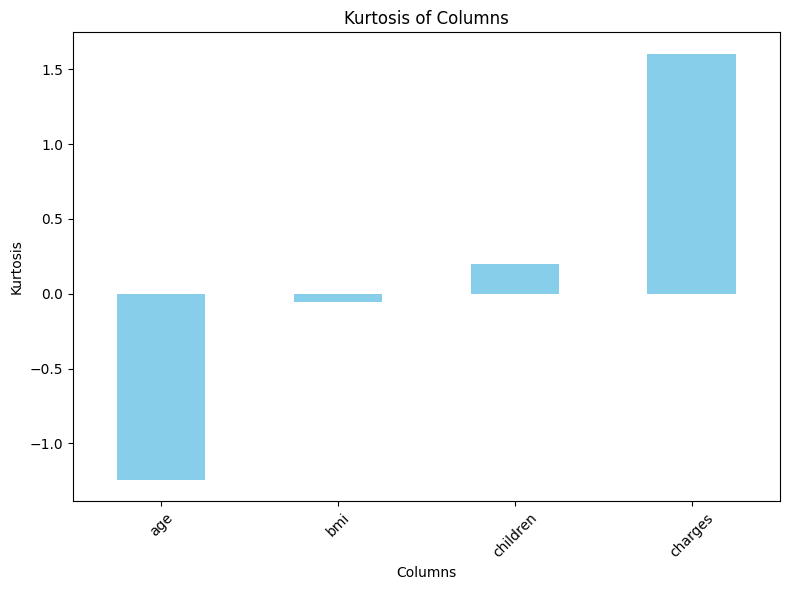

In [8]:
# Checking Skewness and Kurtosis

df_num = df_insurance.select_dtypes(exclude = ['object'])

# Plotting skewness values
skewness = df_num.skew()

plt.figure(figsize=(8, 6))
skewness.plot(kind='bar', color='lightgreen')
plt.title('Skewness of Columns')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting kurtosis values
kurtosis_values = df_num.kurtosis()

plt.figure(figsize=(8, 6))
kurtosis_values.plot(kind='bar', color='skyblue')
plt.title('Kurtosis of Columns')
plt.xlabel('Columns')
plt.ylabel('Kurtosis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

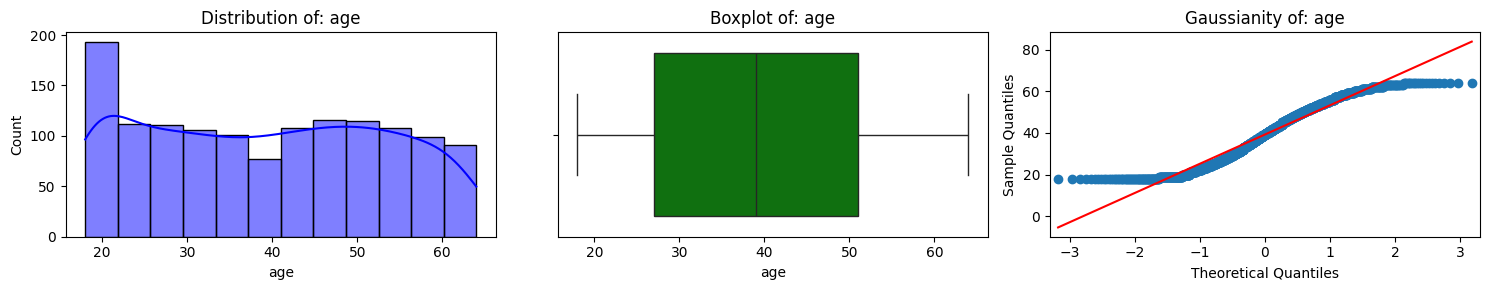

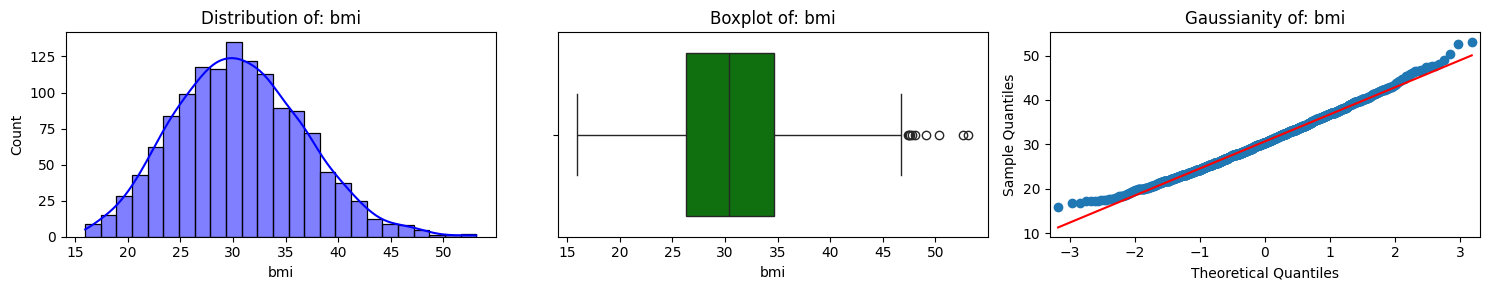

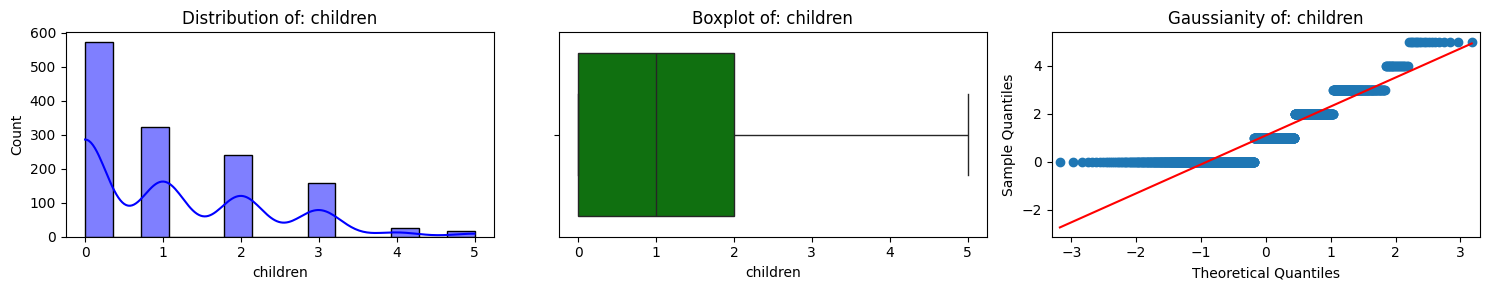

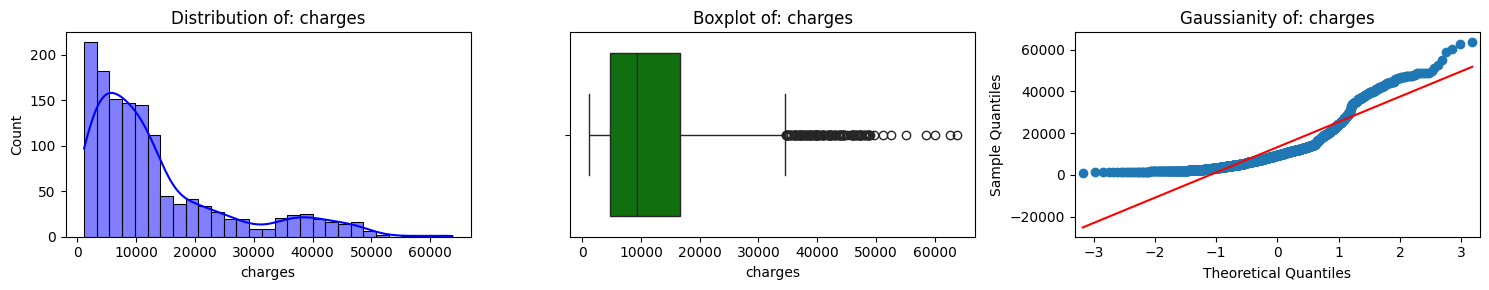

In [9]:
# Distribution

for numerical_feature in df_num.columns:
    
    # Creating three subplots per numerical_feature
    fig, ax =plt.subplots(1,3,figsize=(15,3))
        
    # Histogram to get an overview of the distribution of each numerical_feature
    ax[0].set_title(f"Distribution of: {numerical_feature}")
    sns.histplot(data=df_num, x=numerical_feature, kde=True, ax=ax[0], color='blue')
    
    # Boxplot to detect outliers
    ax[1].set_title(f"Boxplot of: {numerical_feature}")
    sns.boxplot(data=df_num, x=numerical_feature, ax=ax[1], color='green')
    
    # Analyzing whether a feature is normally distributed or not
    ax[2].set_title(f"Gaussianity of: {numerical_feature}")
    qqplot(df_num[numerical_feature], line='s', ax=ax[2], color='orange')
    
    plt.tight_layout()
    plt.show()

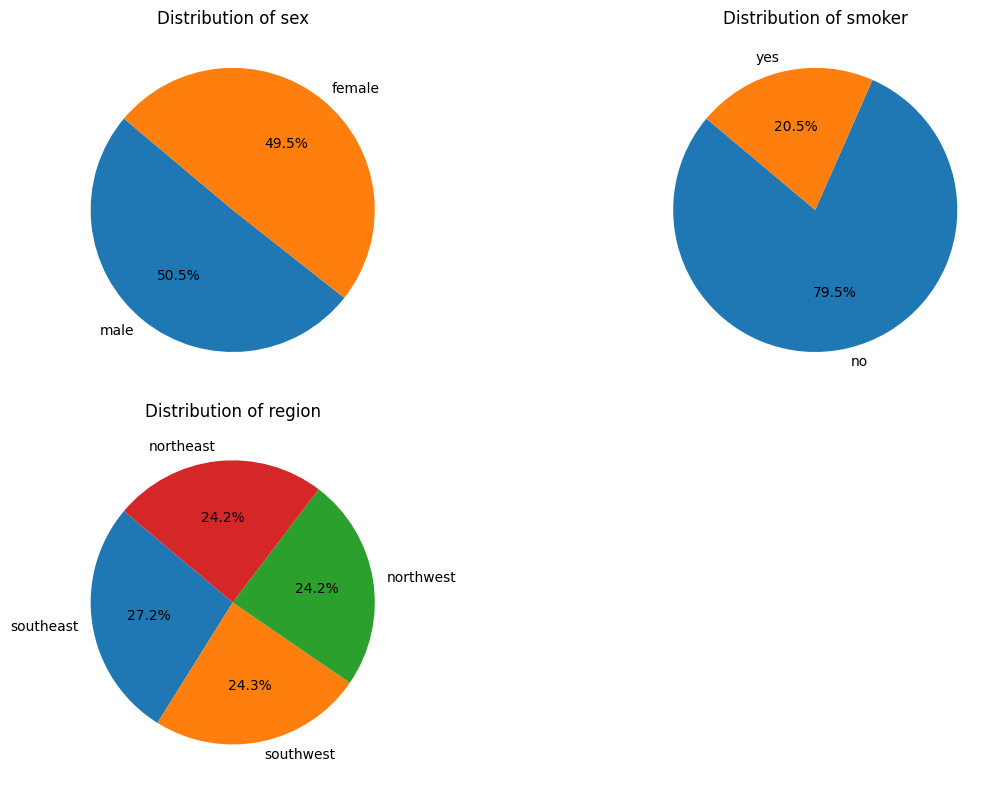

In [10]:
# Selecting categorical columns for pie charts
categorical_columns = list(df_insurance.select_dtypes(include=['object']).columns)

# Determine the number of rows and columns for subplots
num_cols = 2
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols

# Create subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, num_rows * 4))

# Flatten axs for easier iteration if necessary
axs = axs.flatten()

# Plotting pie charts for each categorical column
for i, col in enumerate(categorical_columns):
    # Count the occurrences of each category
    category_counts = df_insurance[col].value_counts()
    
    # Plotting pie chart within Seaborn subplots
    axs[i].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(f'Distribution of {col}')

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

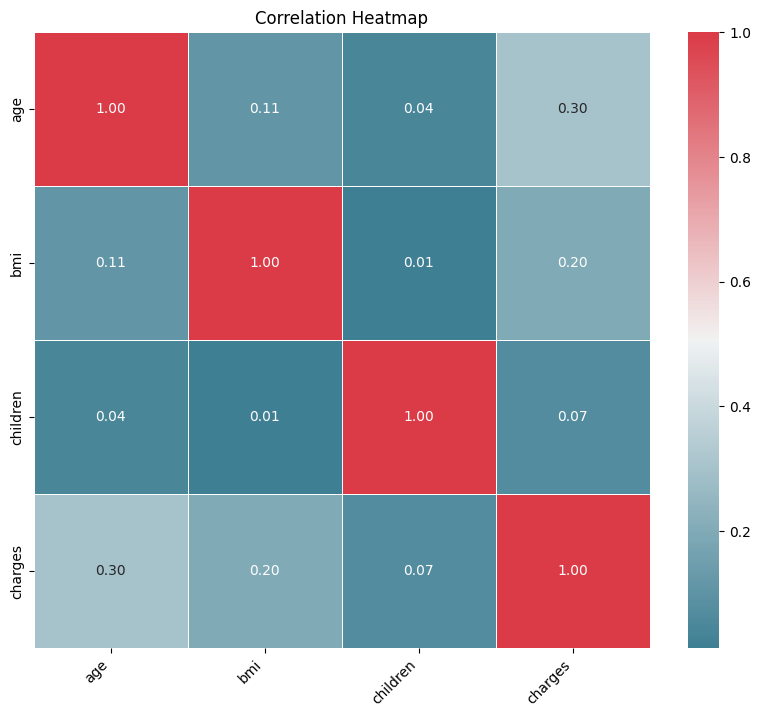

In [11]:
# Plot correlations

plt.figure(figsize=(10, 8))
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha='right')

# Create a custom color palette
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Plot the correlation heatmap
sns.heatmap(df_insurance.corr(numeric_only=True), annot=True, cmap=cmap, fmt=".2f", linewidths=0.5, square=True)

plt.show()

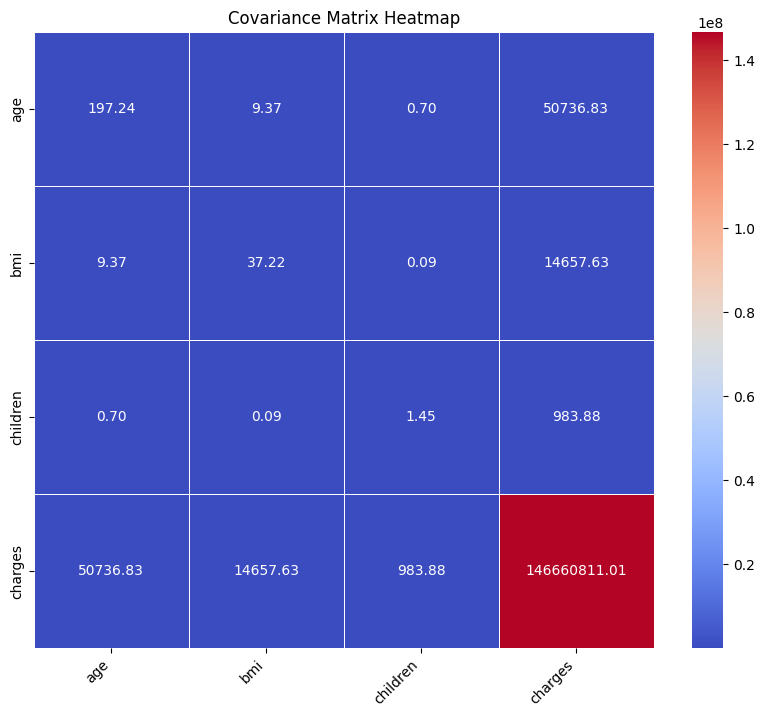

In [12]:
# Plot covariance

# Calculate the covariance matrix
cov_matrix = df_insurance.cov(numeric_only=True)

# Plot the covariance heatmap
plt.figure(figsize=(10, 8))
plt.title('Covariance Matrix Heatmap')
plt.xticks(rotation=45, ha='right')

sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.show()

# Save Clean dataframe

In [13]:
# Clean Data
CLEAN_DATA_FILEPATH = "../data/clean/clean-insurance.csv"

clean_df = df_insurance.to_csv(CLEAN_DATA_FILEPATH, index=False)

clean_df = pd.read_csv(CLEAN_DATA_FILEPATH)
clean_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
